### INTRODUCTION

The state dataframe is based off of two CSV files that contain variables indexed on state names. The independent variable is college attendance rate. The quantatative variables are GDP, Number of households, and Total land/water area. The two qualitative variables are US region and Republican/Democrat.

Citations for data:

Duffin, E. (2022, October 5). Number of households in the United States in 2021, by state. Statistica. Retrieved January 20, 2023, from https://www-statista-com.du.idm.oclc.org/statistics/242258/number-of-us-households-by-state/

US Census Bureau. (September 30, 2011). Total land and water area of the United States by state and territory [Graph]. In Statista. Retrieved February 03, 2023, from https://www-statista-com.du.idm.oclc.org/statistics/203923/united-states-land-area-by-state/

BEA. (March 31, 2022). Gross Domestic Product (GDP) of the United States in 2021, by state (in billion current U.S. dollars) [Graph]. In Statista. Retrieved February 03, 2023, from https://www-statista-com.du.idm.oclc.org/statistics/248023/us-gross-domestic-product-gdp-by-state/

NCES. (May 31, 2012). Share of 20 to 24 year olds enrolled in college or other higher education in the United States in 2010, by state [Graph]. In Statista. Retrieved February 03, 2023, from https://www-statista-com.du.idm.oclc.org/statistics/236111/higher-education-enrollment-rates-by-us-state/

Gallup. (February 22, 2019). Identification with political parties in the United States in 2018, by state [Graph]. In Statista. Retrieved February 03, 2023, from https://www-statista-com.du.idm.oclc.org/statistics/1080003/political-party-identification-state-us/


Read in Code - pandas

In [1]:
#import packagees
import pandas as pd
import numpy as np 
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

#read in csv files into two different Dataframes
df1 = pd.read_csv('HensleyProjectData1.csv')
df2 = pd.read_csv('HensleyProjectData2.csv')

#Merge the dataframes into a single dataframe
dfState = pd.merge(df1, df2, on='State')

dfState.tail()

,State,College_Attendance_in_%,GDP,US_Region,Number_of_Households,Total_Land/Water,Republican/Democrat
46,Virginia,48.3,591.85,SOUTH,3331.46,8723,D
47,Washington,40.6,667.58,WEST,3022.26,5544,R
48,West Virginia,37.2,87.39,SOUTH,722.20,5325,D
49,Wisconsin,41.1,365.93,MIDWEST,2449.97,2489,R
50,Wyoming,44.2,41.62,WEST,242.76,1975,R


In [2]:
#Function to build histogram charts based on histIn input value
#Coded by richard hensley
#3/8/22
def HistBuilder(histIn):
    #build histogram based off college attendance rates
    if histIn == 1:
        dfState["College_Attendance_in_%"].hist()
        plt.title("Distribution of College Attendance Rates")
        plt.show()
    #build histogram based off GDP
    if histIn == 2:
        dfState["GDP"].hist()
        plt.title("Distribution of GDP")
        plt.show()
    #build histogram based off Number of Households
    if histIn == 3: 
        dfState["Number_of_Households"].hist()
        plt.title("Distribution of Number of Households")
        plt.show()
    #build histogram based off Total Land/Water
    if histIn == 4: 
        dfState["Total_Land/Water"].hist()
        plt.title("Distribution of Total Land/Water")
        plt.show()

In [3]:
#Function to run descriptive statistics based on the descIn input value
#Coded by richard hensley
#3/8/22
def DescStats(descIn):
    #Descriptive statistics of College Attendance rate
    if descIn == 1:
        print('Descriptive Statistics for College Attendance in %')
        print(dfState['College_Attendance_in_%'].describe())
        print('\n')
    #Descriptive statistics of GDP
    if descIn == 2:
        print('Descriptive Statistics for GDP')
        print(dfState['GDP'].describe())
        print('\n')
    #Descriptive statistics of Number of Households
    if descIn == 3:
        print('Descriptive Statistics for Number of Households')
        print(dfState['Number_of_Households'].describe())
        print('\n')
    #Descriptive statistics of Total Land/Water
    if descIn == 4:
        print('Descriptive Statistics for Total Land/Water')
        print(dfState["Total_Land/Water"].describe())
        print('\n')
    #Value counts of Republican/Democrat
    if descIn == 5:
        print('Value Counts for Reublican/Democrat')
        print(dfState['Republican/Democrat'].value_counts())
        print('\n')
    #Value counts of US region
    if descIn == 6:
        print('Value Counts for US Region')
        print(dfState['US_Region'].value_counts())
        print('\n')

In [4]:
# Function to run multiple regression models based off dependant variables (regIn)
# Coded by Richard Hensley
# 3/8/22

def RegBuilder(regIn):
    #run regression to predict college attendance off GDP and Number of Households
    if regIn == 1:
        x = dfState['College_Attendance_in_%']
        y = dfState[['GDP','Number_of_Households']]
        y = sm.add_constant(y)
        model = sm.OLS(x,y).fit()
        print(model.summary())
    #run regression to predict College Attendance off Number of Households and Total Land/Water
    if regIn == 2:
        x = dfState['College_Attendance_in_%']
        y = dfState[['Number_of_Households','Total_Land/Water']]
        y = sm.add_constant(y)
        model = sm.OLS(x,y).fit()
        print(model.summary())
    #run regression to predict college attendance off GDP and Total Land/Water
    if regIn == 3:
        x = dfState['College_Attendance_in_%']
        y = dfState[['GDP','Total_Land/Water']]
        y = sm.add_constant(y)
        model = sm.OLS(x,y).fit()
        print(model.summary())

In [5]:
# Function to build multiple scatterplots based on scatIn input value
# Coded by Richard Hensley
# 3/8/22
def ScatterMaker(scatIn):
    #Build scatterplot of College Attendance and GDP
    if scatIn == 1:
        CaGDPCorr=np.corrcoef(dfState['College_Attendance_in_%'],dfState['GDP'])[0][1]
        plt.scatter(dfState['College_Attendance_in_%'],dfState['GDP'])
        plt.title(f"Correlation of College Attendance and GDP:{CaGDPCorr:.2f}")
        plt.xlabel('College Attendance rate')
        plt.ylabel('GDP')
        plt.show()
        print('\n')
    #Build scatterplot of College Attendance and Number of Households
    if scatIn == 2:
        CaHHCorr=np.corrcoef(dfState['College_Attendance_in_%'],dfState['Number_of_Households'])[0][1]
        plt.scatter(dfState['College_Attendance_in_%'],dfState['Number_of_Households'])
        plt.title(f"Correlation of College Attendance and Number of Households:{CaHHCorr:.2f}")
        plt.xlabel('College Attendance rate')
        plt.ylabel('Number of Households')
        plt.show()
        print('\n')
    #Build scatterplot of College Attendance and Total Land/Water
    if scatIn == 3:
        CaTLWCorr=np.corrcoef(dfState['College_Attendance_in_%'],dfState['Total_Land/Water'])[0][1]
        plt.scatter(dfState['College_Attendance_in_%'],dfState['Total_Land/Water'])
        plt.title(f"Correlation of College Attendance and Total Land/Water:{CaTLWCorr:.2f}")
        plt.xlabel('College Attendance rate')
        plt.ylabel('Total Land/Water')
        plt.show()
        print('\n')
    #Build scatterplot of GDP and Number of Households
    if scatIn == 4:
        GDPHousesCorr=np.corrcoef(dfState['GDP'],dfState['Number_of_Households'])[0][1]
        plt.scatter(dfState['GDP'],dfState['Number_of_Households'])
        plt.title(f"Correlation of GDP and Number of Households:{GDPHousesCorr:.2f}")
        plt.xlabel('GDP')
        plt.ylabel('Number of Households')
        plt.show()
        print('\n')
    #Build scatterplot of GDP and Total Land/Water
    if scatIn == 5: 
        GDPTLWCorr=np.corrcoef(dfState['GDP'],dfState['Total_Land/Water'])[0][1]
        plt.scatter(dfState['GDP'],dfState['Total_Land/Water'])
        plt.title(f"Correlation of GDP and Total Land/Water:{GDPTLWCorr:.2f}")
        plt.xlabel('GDP')
        plt.ylabel('Total Land/Water')
        plt.show()
        print('\n')
    #Build scatterplot of Number of Households and Total Land/Water
    if scatIn == 6:
        HHTLWCorr=np.corrcoef(dfState['Number_of_Households'],dfState['Total_Land/Water'])[0][1]
        plt.scatter(dfState['Number_of_Households'],dfState['Total_Land/Water'])
        plt.title(f"Correlation of Number of Households and Total Land/Water:{HHTLWCorr:.2f}")
        plt.xlabel('Number of Households')
        plt.ylabel('Total Land/Water')
        plt.show()
        print('\n')

### REPORT

## Reseach Q1
#1. Can you predict total state college attendance percentage bassed off of state GDP and total land/water area?

In [6]:
#Use RegBuilder Function to run regression of GDP and Total Land/Water
RegBuilder(3)

                               OLS Regression Results                              
Dep. Variable:     College_Attendance_in_%   R-squared:                       0.066
Model:                                 OLS   Adj. R-squared:                  0.027
Method:                      Least Squares   F-statistic:                     1.701
Date:                     Sun, 12 Mar 2023   Prob (F-statistic):              0.193
Time:                             12:42:43   Log-Likelihood:                -146.68
No. Observations:                       51   AIC:                             299.4
Df Residuals:                           48   BIC:                             305.2
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

The Regression model using our dependant variables GDP and Total Land/Water Area to predict Total College Attendance rate is not a good fitting model. 
    
    The adjusted R-squared value is extremely low with only 0.027 of our dependant variables. By checking for multicolinearity, we can see that GDP and Number of Households are heavily correlated with a correlation rate of .97 which tells us we do not need to use both of those variables in the same model. 
    
    Through testing numerous other models, with similar low Adj. R-Squared values from all other permutations of our model to predict college attendance rate.
    
    Though this model would be useful in education related business operation, this model does not fit our independant variable, and needs different data tested

## Reseach Q2
#2. Is the mean college attendance in the West greater than other regions? 

The groups are SOUTH and WEST and NORTHEAST and MIDWEST
This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 12.416 and the p-value is 0.0
Conclusion: Reject Ho: At least one group mean is different


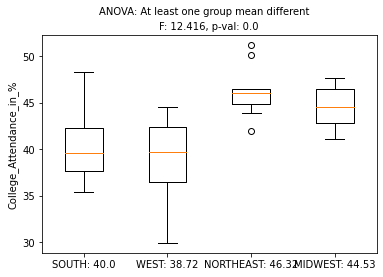

Ho: The group means are equal
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
  MIDWEST NORTHEAST   1.7889 0.6305  -2.2714  5.8492  False
  MIDWEST     SOUTH  -4.5333 0.0052  -7.9649 -1.1018   True
  MIDWEST      WEST  -5.8083  0.001  -9.5674 -2.0492   True
NORTHEAST     SOUTH  -6.3222  0.001 -10.0813 -2.5631   True
NORTHEAST      WEST  -7.5972  0.001 -11.6575 -3.5369   True
    SOUTH      WEST   -1.275 0.7323  -4.7066  2.1566  False
-----------------------------------------------------------


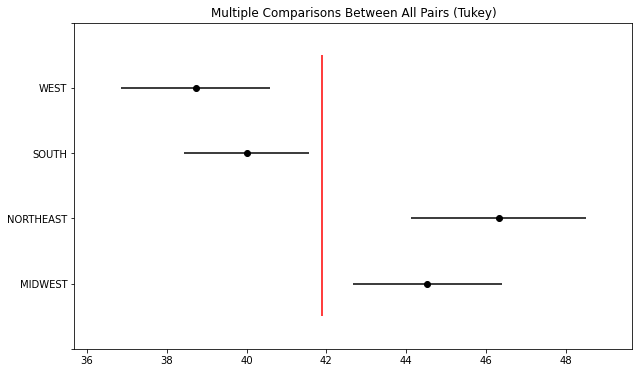

In [7]:
#import Stattests and run an ANOVA test on mean college attendance based off of US Region
import StatTests
StatTests.MeansTest(dfState,'US_Region','College_Attendance_in_%')

#HO: All mean are equal
#Ha: At least one group mean is different

    The mean college attendance percent for the West = 38.72; which is the lowest for any region.
    The Northeast has the highest college attendance rate (46.32), with +7.6 points difference to the West.
    
    Though we can see a difference in College Attendance rate based off of US Region, they are all relatively close to each other. The West has the lowest minimum (Nevanda @ 29.9%) , as well as the lowest maximum attendance rate (California @ 44.5). The Northeast has the lowest count of states while also having the highest average (46.32%), the highest minimum (Maine @ 42.0%), and the highest maximum (Massachusetts @ 51.2%) which is impressive.
    
    The results of the ANOVA test show that there is statistical difference between at least one of the variables provided. We reject the null hypothesis, given the p-value of 4.187e-6 which is lower than out alpha valaue (0.05).

## Reseach Q3
#3. Is there a difference in College Attendance rates based on Political Alignment?

The groups are R and D

This is a test of equal variances with Ho: The variances are equal
The t test statistic is 0.108 and the p-value is 0.7429
Conclusion: Fail to Reject Ho: We can't reject that the variances are the same

This is a Two-Sample t test (assuming equal variances) of equal means with Ho: The group means are equal
The t test statistic is -0.796 and the p-value is 0.43
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


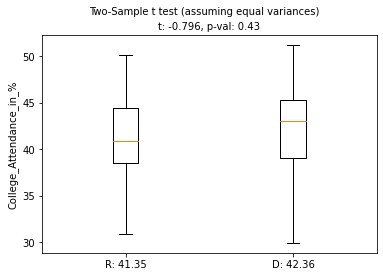

In [8]:
# Run two-sample T-test on the means of Democratic and Rebulican state College Attendance rate
StatTests.MeansTest(dfState,'Republican/Democrat','College_Attendance_in_%')

#HO: The variances are equal
#Ha: The variances are not equal

    Based on our t-static and p-value we cannot reject the null hypothesis that there is no statistic difference in College Attendance Rate based of if the state was Democratic or Republican. 

    The T-Statistic (0.796) tells us that there is very little difference between college attendance rates is relatively small between these groups and can be considered not significant. The P-value (0.43) tells us that the probability of obtaining a difference in means is as large or larger than what was observed. 

    We can conclude that there is no statistical differance in mean college attendance rate based of of Republican or Democratic political leaning. 

## MENU

In [ ]:
# Menu to run multiple different statistical anaylisis on the State Dataset
# Menu will run until quit option is selected in each menu and submenu

#Initialize user input @ 0 
FirstIn = 0

#Menu runs within a while look till FirstIn == 9 
while FirstIn != 10:
    #Print menu options
    print("Menu:")
    print("1. Crosstabulation")
    print("2. Correlation Matrix")
    print("3. ANOVA Test")
    print("4. Two Sample T-Test")
    print("5. Regression")
    print("6. Histogram")
    print("7. Descriptive Statistics")
    print("8. Scatterplot ")
    print("9. Read to Excel file")
    print("10. Quit")
    print("\n")
    #Input box for FirstInput, input will decide which menu option will run
    FirstIn = input("please enter a number between 1 and 10:")
  #  if FirstIn != ('1','2','3','4','5','6','7','8','9'):
   #     FirstIn = input('please enter a number between 1 and 9:')
    FirstIn = int(FirstIn)
    #If input = 1: run cross tabulation of Qualitative variables
    if FirstIn == 1:
        cross_tab = pd.crosstab(dfState['US_Region'], dfState['Republican/Democrat'])
        print("\n")
        print(cross_tab)
        print("\n")
    #If input = 2 run correlation matrix on Quantative variables
    if FirstIn == 2:
        print("\n")
        corr_matrix = dfState.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
        plt.show()
        print("\n")
    #If input = 3 run an ANOVA test of college attendance rate based on US Region
    if FirstIn == 3:
        StatTests.MeansTest(dfState,'US_Region','College_Attendance_in_%')
        print("\n")
    #If input = 4 run two sample T-test of College Attendance rate based of Republican and Democratic states
    if FirstIn == 4:
        StatTests.MeansTest(dfState,'Republican/Democrat','College_Attendance_in_%')
        print("\n")
    #If input = 5 open Regression Menu
    if FirstIn == 5:
        #initalize regIn input value
        regIn = 0
        while regIn != 4:
            print('Regression Menu:')
            print('Select which variable you would like to use in the model')
            print('1. GDP & Number of Households')
            print('2. Number of Households & Total Land/Water')
            print('3. GDP & Total Land/Water')
            print('4. Quit')
            print('\n')
            #get user input for regIn
            regIn = input('please enter a number between 1 and 4:')
   #         if regIn != (1,2,3,4):
    #            regIn = input('please enter a number between 1 and 4:')
            regIn = int(regIn)
            #Use prebuilt function to run regression model on chosen variables based on regIn input value
            RegBuilder(regIn)
            print('\n')
    if FirstIn == 6:
        histIn = 0
        while histIn != 5:
            print("Histogram Menu:")
            print("1. College Attendance Rate")
            print("2. GDP")
            print("3. Number of Households")
            print("4. Total Land/Water")
            print("5. Quit")
            print("\n")
            histIn = input("please enter a number between 1 and 5:")
   #         if histIn != (1,2,3,4,5):
  #              histIn = input('please enter a number between 1 and 5:')
            histIn = int(histIn)
            HistBuilder(histIn)
            print("\n")
    if FirstIn == 7:
        descIn = 0
        while descIn != 7:
            print("Descriptive Statistics Menu:")
            print("1. College Attendance in %")
            print("2. GDP")
            print("3. Number of Households")
            print("4. Total Land/Water")
            print("5. Republican/Democrat")
            print("6. Region")
            print("7. Quit")
            print("\n")
            descIn = input("please enter a number between 1 and 7:")
   #         if descIn != (1,2,3,4,5,6,7):
    #            descIn = input('please enter a number between 1 and 7:')
            descIn = int(descIn)
            DescStats(descIn)
    if FirstIn == 8:
        scatIn = 0
        while scatIn != 7:
            print('Scatterplot Menu:')
            print('1. College Attendance and GDP')
            print('2. College Attendance and Number of Households')
            print('3. College Attendance and Total Land/Water')
            print('4. GDP and Number of Households')
            print('5. GDP and Total Land/Water')
            print('6. Households and Total Land/Water')
            print('7. Quit')
            print('\n')
            scatIn = input('please enter a number between 1 and 7:')
   #         if scatIn != (1,2,3,4,5,6,7):
    #            scatIn = input('please enter a number between 1 and 7:')
            scatIn = int(scatIn)
            ScatterMaker(scatIn)
    if FirstIn == 9:
        #dfState.to_excel('StateXcel.xlsx')
        dfState.to_excel('StateXcel.xlsx', sheet_name='CollegeAttendance', index=False)

Menu:
1. Crosstabulation
2. Correlation Matrix
3. ANOVA Test
4. Two Sample T-Test
5. Regression
6. Histogram
7. Descriptive Statistics
8. Scatterplot 
9. Read to Excel file
10. Quit




### Conclusion:

This data set was created in the attempt tp predict college attendance rate by state based on a number of quantitative and qualitative variables for each state. Unfortunately this data set does not do a good job of presdicting College Attendance rates. 

Two interesting things this data set tells us are that College attendance rates are not affected by political leaning and that the western region of the US has lower college attendance rates on average compaired to other Regions. Going into this project, I had assumed that the Western US would have had the highest college attendance rate for all the regions because of states like california, oregeon, and washinton. What the data tells us is that the Western US is pretty similar to the Southern US, but has a wider range than any other Region. It turns out that the North East Region has the best overall college attendance rate. 

Overall, this data set needs to be improved in order to predict college attendance rates better. Possible variables to add could be: Median household earnings, average household size, and State birthrates just to name a few. With better variables, the model we created will fit the data much better.